# Week 7. Pandas 시각화

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#Configure Defaults
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'

In [49]:
import pandas as pd
df = pd.read_csv('../data/시험점수.csv')
df.head()

,일자,이름,국어,영어,수학,역사,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,A유형,True
1,2001-04-02 20:21:00,수철,93,48,81,84,B유형,True
2,2001-04-03 20:21:00,수철,30,64,26,84,C유형,False
3,2001-04-04 20:21:00,철수,74,72,46,65,D유형,True
4,2001-04-05 20:21:00,영희,42,26,79,91,E유형,True


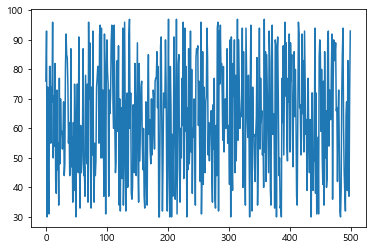

In [3]:
df['국어'].plot()

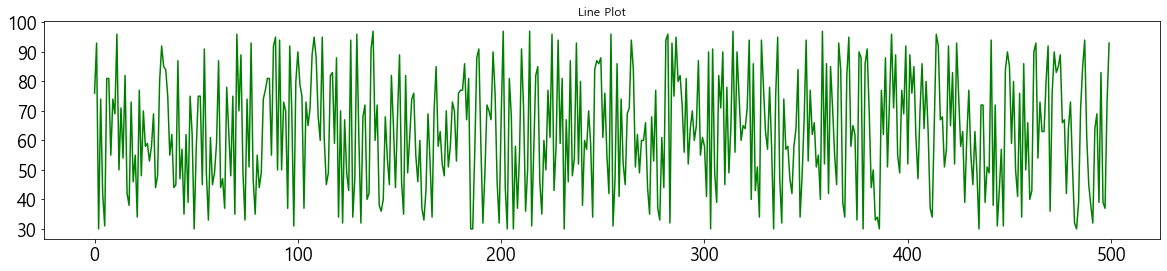

In [4]:
df['국어'].plot(figsize=(20, 4), color='green', title = 'Line Plot', fontsize=18)

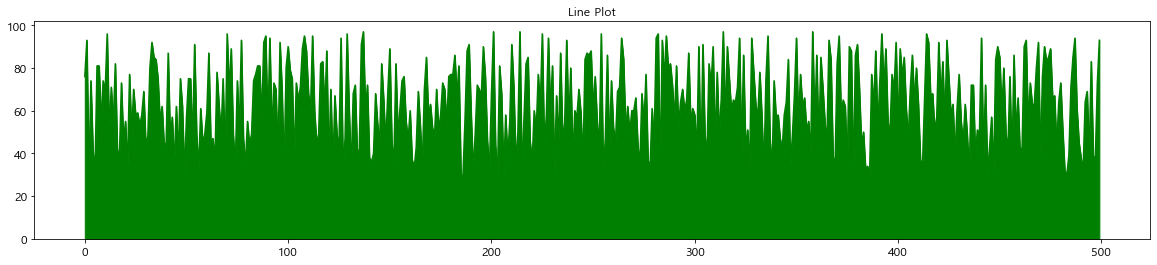

In [5]:
df['국어'].plot(kind='area', figsize=(20, 4), color='green', title = 'Line Plot', fontsize=12)

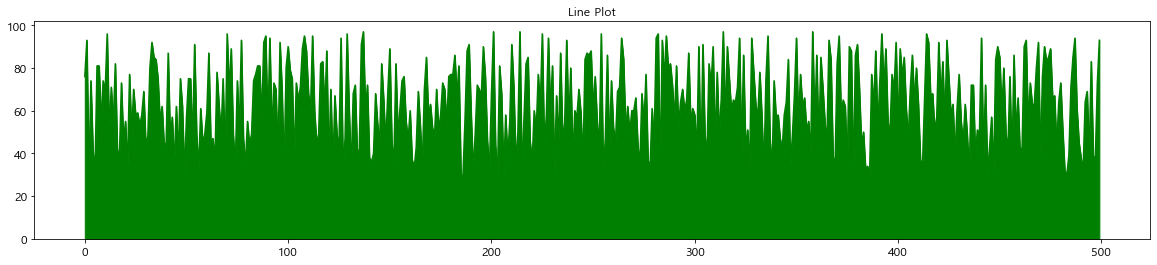

In [6]:
df['국어'].plot.area(figsize=(20, 4), color='green', title = 'Line Plot', fontsize=12)

,국어,영어,수학
0,76,81,26
1,93,48,81
2,30,64,26
3,74,72,46
4,42,26,79


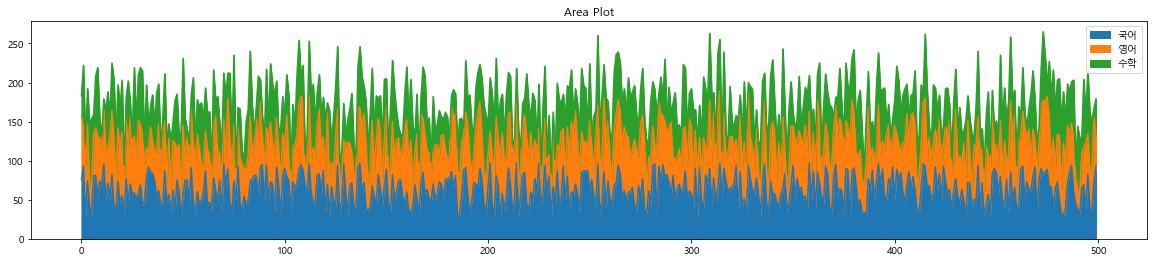

In [7]:
data = df[['국어', '영어', '수학']]
data.head()
data.plot.area(figsize=(20, 4), title='Area Plot')

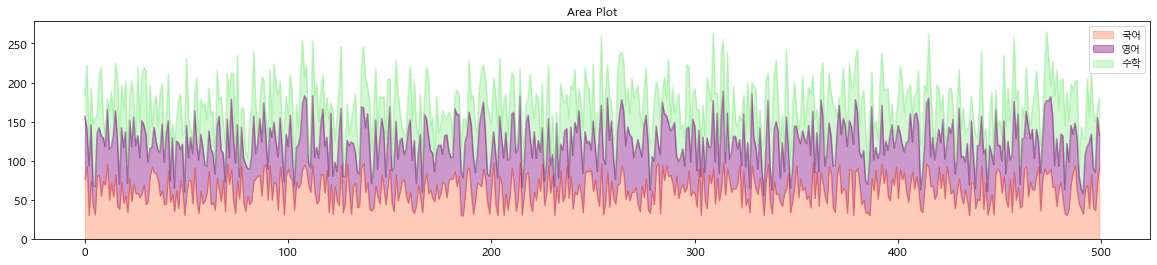

In [9]:
data.plot.area(alpha=0.4, color=['coral', 'purple', 'lightgreen'],figsize=(20,4), title='Area Plot', fontsize=12)

### pandas.plot() function can make eleven types of plots:
- line
- area
- bar
- barh
- pie
- box
- hexbin
- hist
- kde
- density
- scatter

## Histogram

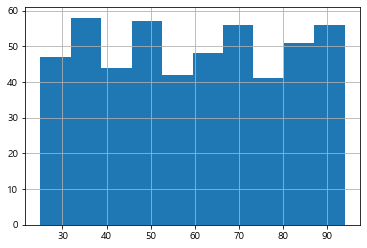

In [10]:
df['영어'].hist()

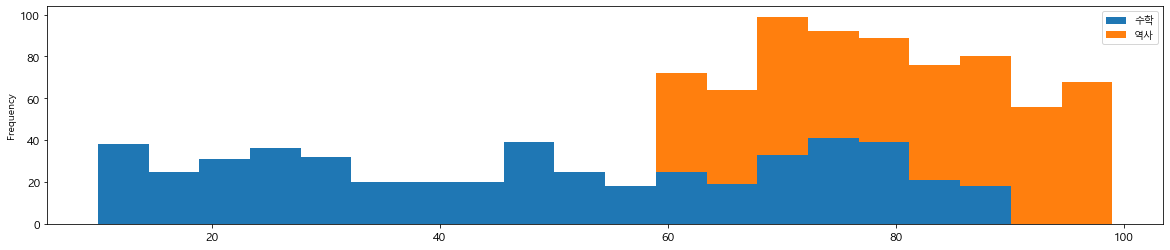

In [13]:
df[['수학', '역사']].plot.hist(stacked=True, bins=20, fontsize=12, figsize=(20, 4))

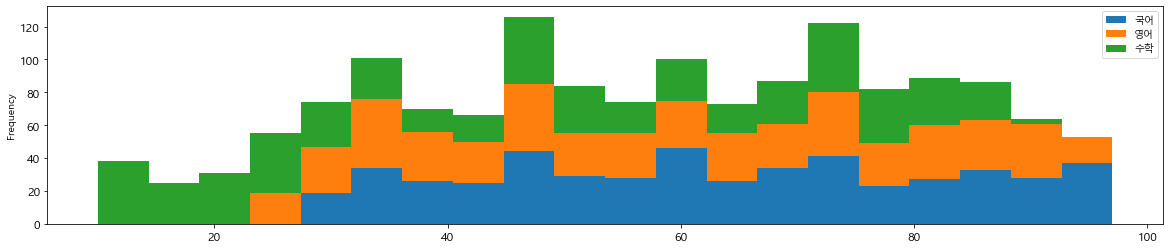

In [14]:
data.plot.hist(stacked=True, bins=20, fontsize=12, figsize=(20, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241B5E48B48>,
      dtype=object)

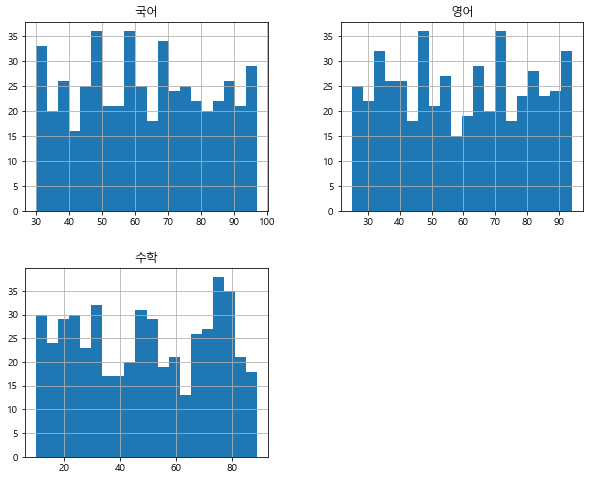

In [15]:
data.hist(bins=20,figsize=(10, 8))

In [16]:
df.head()

,일자,이름,국어,영어,수학,역사,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,A유형,True
1,2001-04-02 20:21:00,수철,93,48,81,84,B유형,True
2,2001-04-03 20:21:00,수철,30,64,26,84,C유형,False
3,2001-04-04 20:21:00,철수,74,72,46,65,D유형,True
4,2001-04-05 20:21:00,영희,42,26,79,91,E유형,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241B6BB7E08>,
      dtype=object)

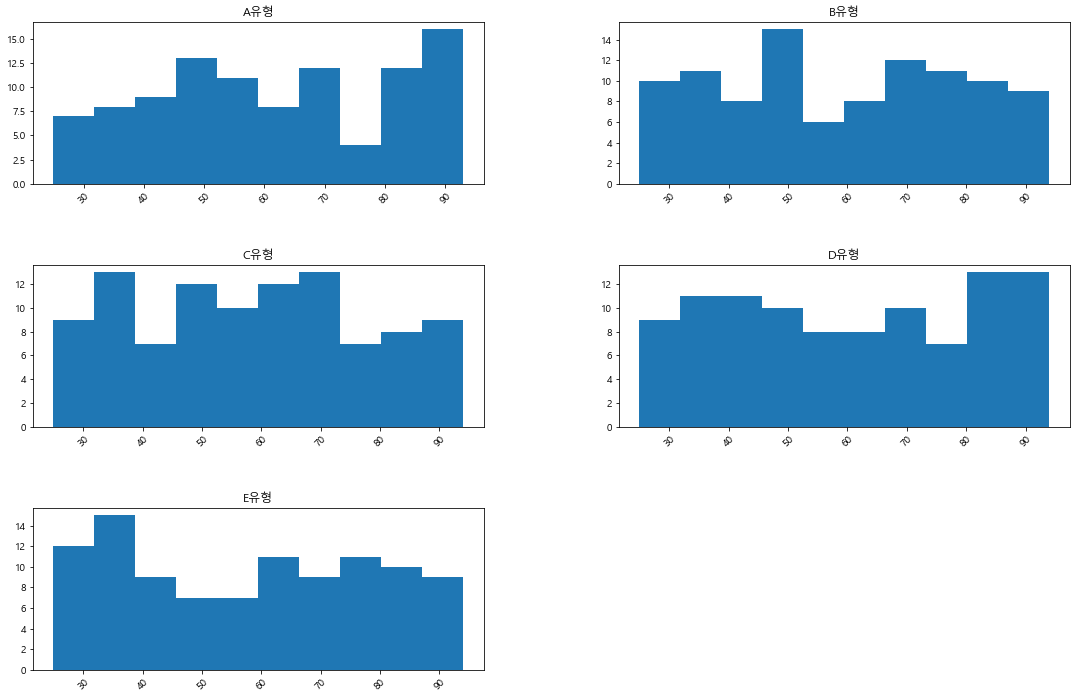

In [18]:
df[['시험명', '영어']].hist(by='시험명', rot ='45', figsize=(18, 12))

'A유형'

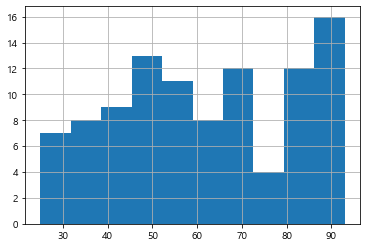

'B유형'

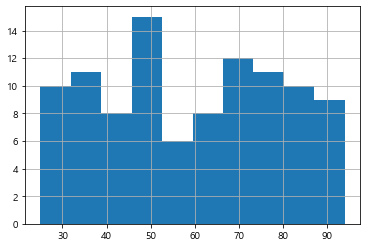

'C유형'

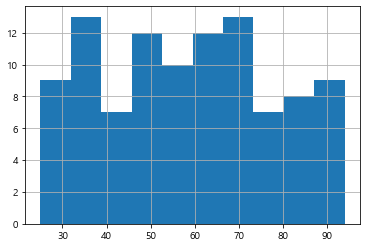

'D유형'

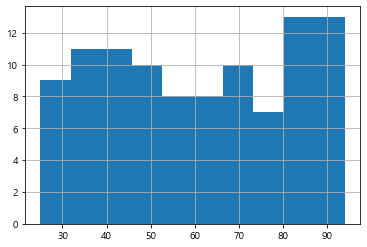

'E유형'

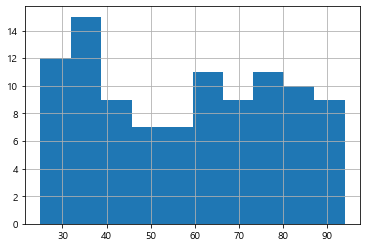

In [22]:
for i, data in df.groupby('시험명'):
    i
    data['영어'].hist(); plt.show()

## Bar Plot

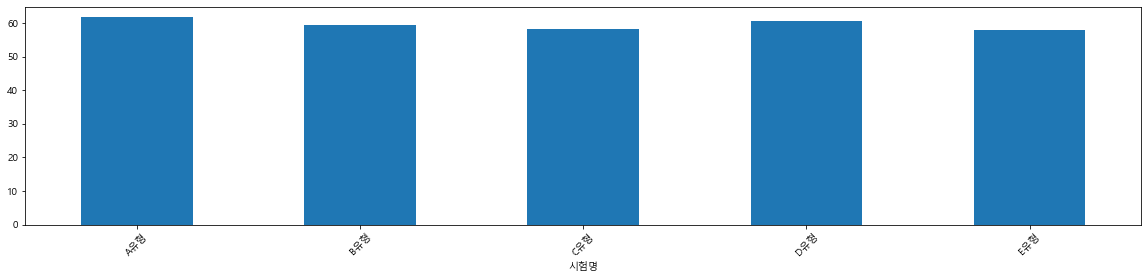

In [24]:
df.groupby('시험명')['영어'].mean().plot(kind='bar', rot=45, fontsize=10, figsize=(20, 4))

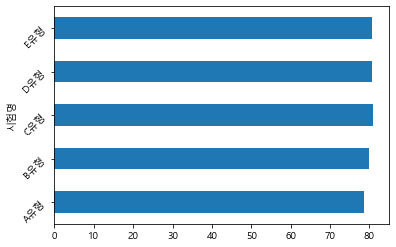

In [25]:
df.groupby('시험명')['역사'].mean().plot(kind='barh', rot=45, fontsize=10, figsize=(6, 4))

In [26]:
data = df.groupby('시험명')['국어', '영어', '수학'].mean().reset_index()
data

,시험명,국어,영어,수학
0,A유형,60.40,61.71,49.05
1,B유형,63.94,59.39,48.97
2,C유형,64.52,58.34,50.22
3,D유형,60.32,60.57,50.36
4,E유형,65.89,58.04,46.61


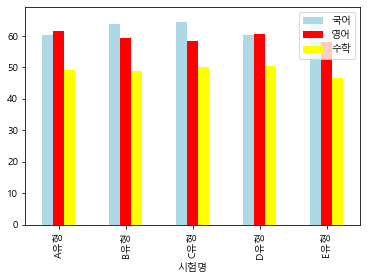

In [27]:
data.plot(x = '시험명',
          y=['국어', '영어', '수학'], 
          kind = 'bar', 
          color = ['lightblue', 'red', 'yellow'], 
          fontsize=10)

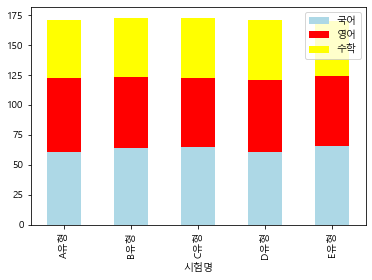

In [28]:
data.plot(x = '시험명',
          y=['국어', '영어', '수학'], 
          kind = 'bar', 
          stacked=True,
          color = ['lightblue', 'red', 'yellow'], 
          fontsize=10)

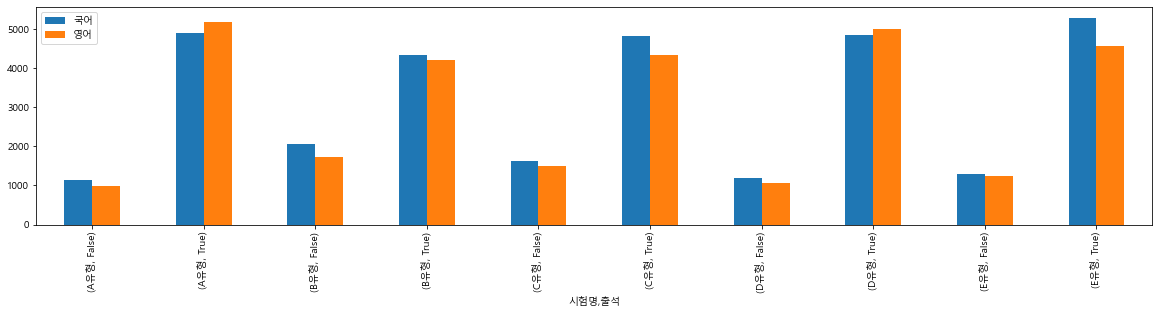

In [29]:
df.groupby(['시험명', '출석'])['국어', '영어'].agg('sum', 'mean').plot(kind='bar', figsize=(20, 4))

## Pie Plot

In [25]:
data = df.groupby('출석')['영어'].count()
data

출석
False    110
True     390
Name: 영어, dtype: int64

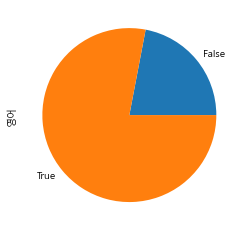

In [26]:
ax = data.plot.pie()

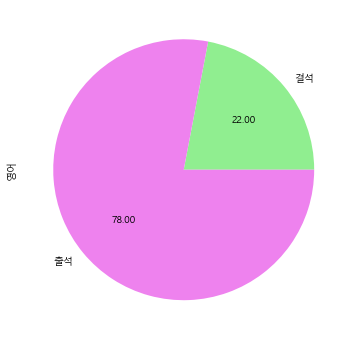

In [27]:
ax = data.plot.pie(labels = ['결석', '출석'], 
                   figsize = (8, 6),
                   colors = ['lightgreen', 'violet'],
                   autopct = '%.2f')

## Boxplot

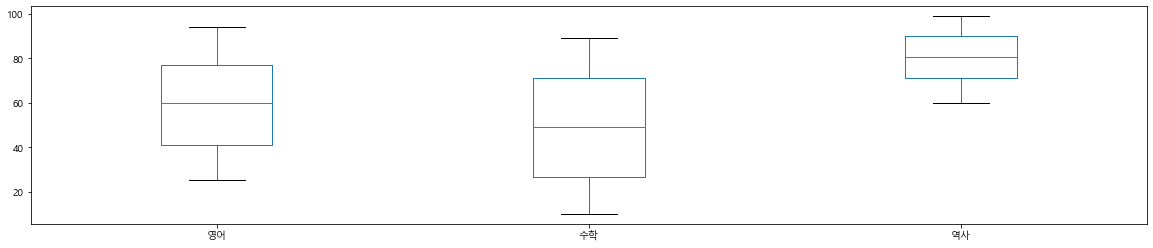

In [32]:
#color = {'boxes': 'DarkBlue', 'whiskers': 'coral', 'medians': 'Black', 'caps': 'Green'}
df[['영어', '수학', '역사']].plot.box(figsize=(20, 4))

## Scatter Plot

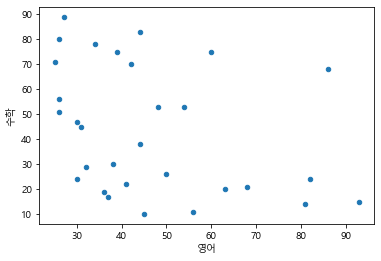

In [33]:
df.sample(30).plot(x='영어', y= '수학', kind = 'scatter')

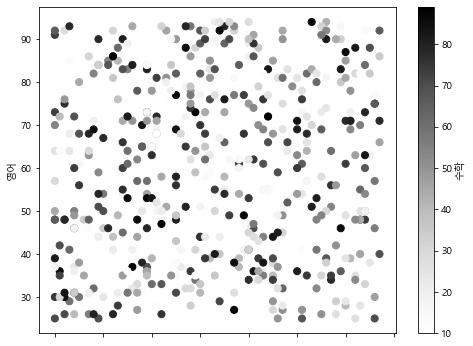

In [34]:
df.plot.scatter(x= '국어', y = '영어', c ='수학',  s=50, figsize=(8, 6))

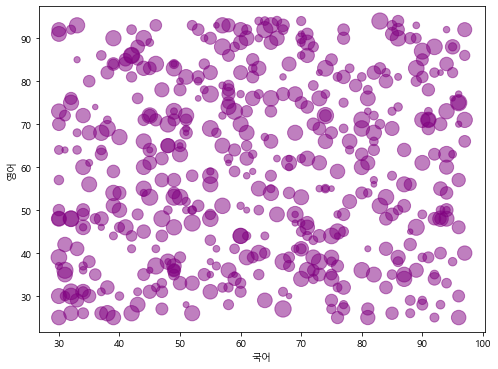

In [35]:
df.plot.scatter(x= '국어', y = '영어', 
                s =df['수학']* 3, 
                alpha=0.5, color='purple',
                figsize=(8, 6))

## hexbin

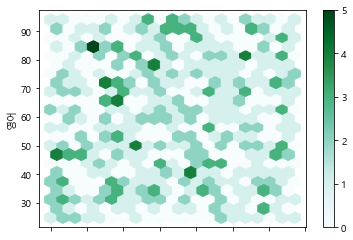

In [32]:
df.plot.hexbin(x= '국어', y = '영어', gridsize= 20)

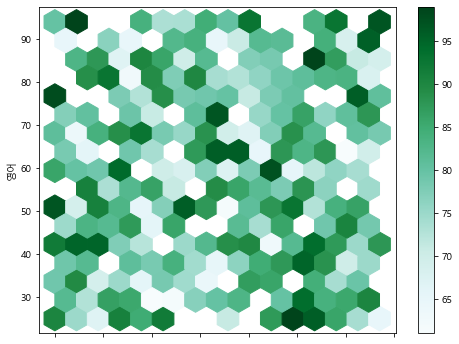

In [33]:
import numpy as np
df.plot.hexbin(x= '국어', y = '영어', 
               C = '역사',
               gridsize=15,
               figsize=(8,6))

ValueError: 'sring' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

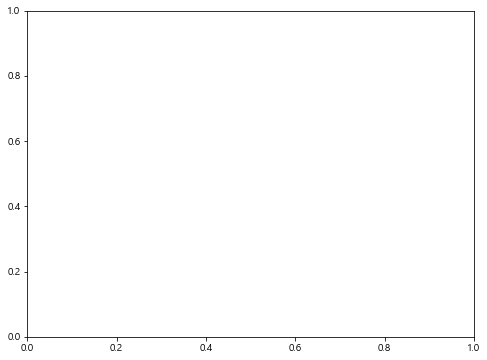

In [37]:
import numpy as np
df.plot.hexbin(x= '국어', y = '영어', 
               C = '역사', 
               gridsize=15,
               cmap = 'sring',
               figsize=(8,6))

## Scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B87A9B7248>,
      dtype=object)

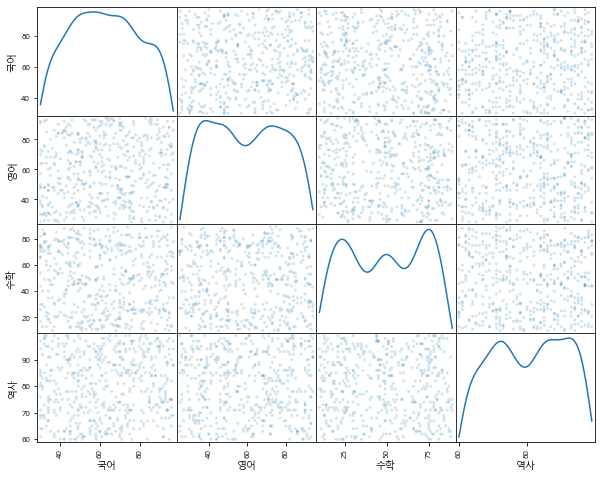

In [35]:
from pandas.plotting import scatter_matrix
data = df[['국어', '영어', '수학', '역사']]
scatter_matrix(data, alpha = 0.2, figsize=(10, 8), diagonal = 'kde')

## KDE or density plot

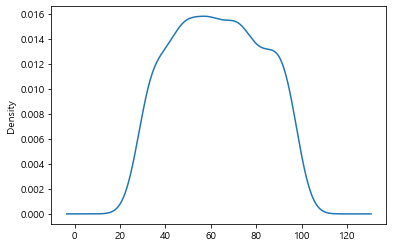

In [39]:
df['국어'].plot.kde()

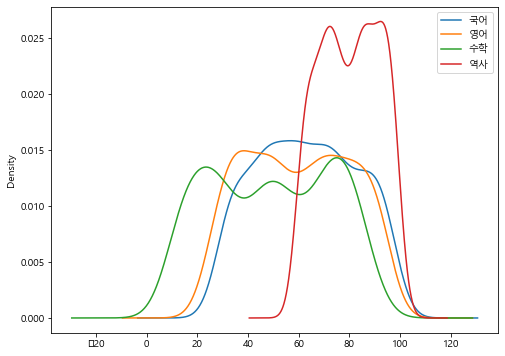

In [37]:
data.plot.kde(figsize = (8, 6))

## Parallel_coordinates
This is a good way of showing multi-dimensional data. It clearly shows the clusters if there are any. 

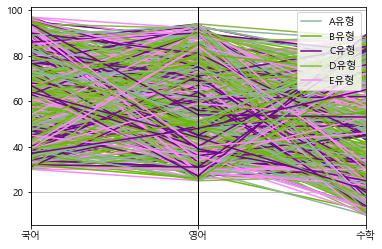

In [40]:
from pandas.plotting import parallel_coordinates
data = df[['시험명', '국어', '영어', '수학']]
parallel_coordinates(data, '시험명')

In [41]:
from sklearn.datasets import load_iris, load_wine
wine = load_wine()
wine_data = np.hstack((wine.data, wine.target.reshape(-1,1)))

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names+ ['WineCategory'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineCategory
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [40]:
wine_df.WineCategory.value_counts()

1.0    71
0.0    59
2.0    48
Name: WineCategory, dtype: int64

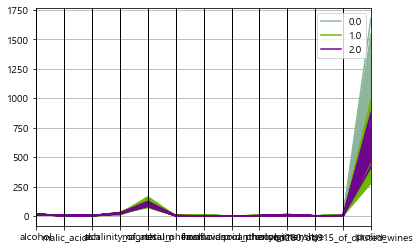

In [42]:
parallel_coordinates(wine_df, 'WineCategory')

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_df.iloc[:,:-1])
wine_df.iloc[:,:-1] = scaler.transform(wine_df.iloc[:,:-1])

StandardScaler()

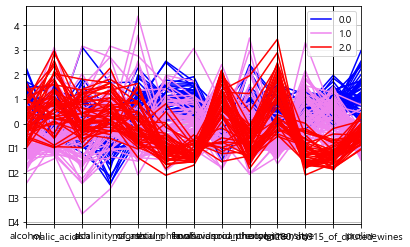

In [44]:
parallel_coordinates(wine_df, 'WineCategory', color=['blue', 'violet', 'red'])

## Fourier graph

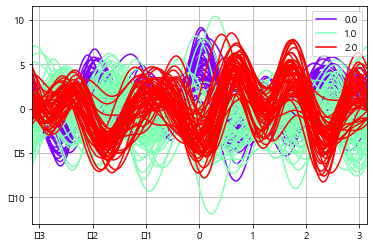

In [45]:
from pandas.plotting import andrews_curves
andrews_curves(wine_df, 'WineCategory',colormap='rainbow')
plt.show()

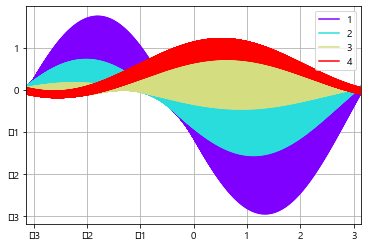

In [46]:
# case 1
x = np.linspace(-1, 1, 1000)
df = pd.DataFrame({'A': np.sin(x**2)/x, 'B': np.sin(x)*np.exp(-x),
                   'C': np.cos(x)*x, 'D': 1})
df.iloc[200:400, 3:4] = 2
df.iloc[400:700, 3:4] = 3
df.iloc[700:1000, 3:4] = 4
andrews_curves(df, "D",colormap='rainbow')
plt.show()

## Bootstrap_plot
20개 표본(size)을 resampling을 총 100회(samples)를 한 통계량 (중심극한정리 증명)

In [51]:
df

,일자,이름,국어,영어,수학,역사,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,A유형,True
1,2001-04-02 20:21:00,수철,93,48,81,84,B유형,True
2,2001-04-03 20:21:00,수철,30,64,26,84,C유형,False
3,2001-04-04 20:21:00,철수,74,72,46,65,D유형,True
4,2001-04-05 20:21:00,영희,42,26,79,91,E유형,True
...,...,...,...,...,...,...,...,...
495,2002-08-09 20:21:00,희영,83,51,81,85,A유형,True
496,2002-08-10 20:21:00,희영,39,51,71,96,B유형,True
497,2002-08-11 20:21:00,수철,37,48,65,74,C유형,True
498,2002-08-12 20:21:00,영희,73,82,12,71,D유형,False


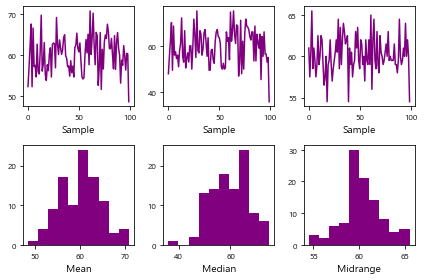

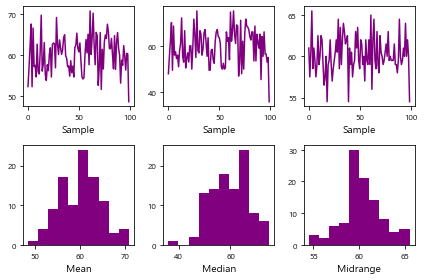

In [52]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(df['영어'], size=20, samples=100, color='purple');plt.show()

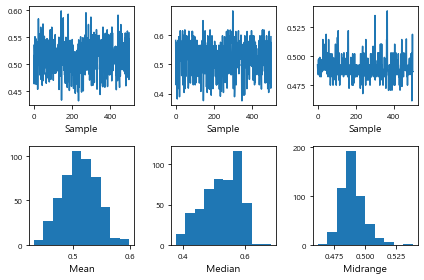

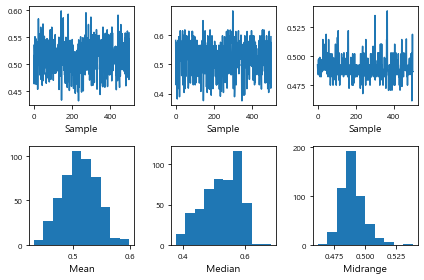

In [47]:
s = pd.Series(np.random.uniform(size=100))
pd.plotting.bootstrap_plot(s)